<a href="https://colab.research.google.com/github/pravanjangarg20/Machine_Learning_project/blob/main/Housing_price_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data =pd.read_csv('housing.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
train_data=x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11021,-117.83,33.83,13.0,3759.0,489.0,1496.0,499.0,8.3818,<1H OCEAN,377600.0
8871,-118.41,34.06,43.0,2665.0,556.0,1015.0,506.0,4.1411,<1H OCEAN,500001.0
11722,-120.07,39.24,20.0,3729.0,614.0,365.0,152.0,4.9620,INLAND,169500.0
15012,-117.04,32.76,43.0,3171.0,665.0,1534.0,625.0,3.1410,NEAR OCEAN,141400.0
19013,-122.01,38.36,15.0,476.0,67.0,213.0,73.0,7.1053,INLAND,315200.0
...,...,...,...,...,...,...,...,...,...,...
12670,-121.46,38.48,8.0,3593.0,659.0,1710.0,530.0,3.5227,INLAND,93100.0
12927,-121.30,38.65,26.0,3192.0,447.0,1132.0,418.0,4.5278,INLAND,144300.0
19700,-121.68,39.13,17.0,1969.0,297.0,717.0,268.0,3.4698,INLAND,179700.0
8972,-118.41,34.01,44.0,2010.0,394.0,961.0,365.0,4.5982,<1H OCEAN,333500.0


<ipython-input-14-89e36abfcc5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

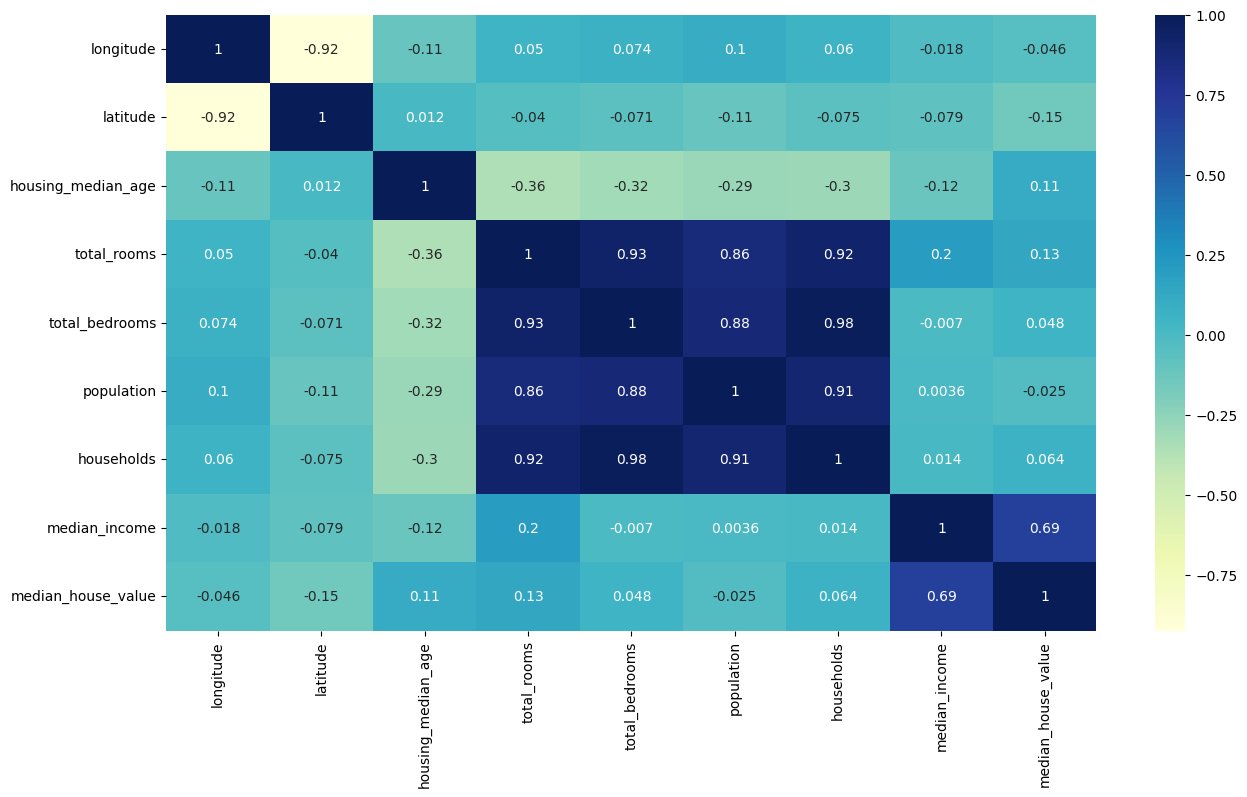

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [ ]:
train_data["total_rooms"]=np.log(train_data['total_rooms']+1)
train_data["total_bedrooms"]=np.log(train_data['total_bedrooms']+1)
train_data["population"]=np.log(train_data['population']+1)
train_data["households"]=np.log(train_data['households']+1)


In [ ]:
train_data=train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'],axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11021,-117.83,33.83,13.0,8.232174,6.194405,7.311218,6.214608,8.3818,377600.0,1,0,0,0,0
8871,-118.41,34.06,43.0,7.888335,6.322565,6.923629,6.228511,4.1411,500001.0,1,0,0,0,0
11722,-120.07,39.24,20.0,8.224164,6.421622,5.902633,5.030438,4.9620,169500.0,0,1,0,0,0
15012,-117.04,32.76,43.0,8.062118,6.501290,7.336286,6.439350,3.1410,141400.0,0,0,0,0,1
19013,-122.01,38.36,15.0,6.167516,4.219508,5.365976,4.304065,7.1053,315200.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12670,-121.46,38.48,8.0,8.187021,6.492240,7.444833,6.274762,3.5227,93100.0,0,1,0,0,0
12927,-121.30,38.65,26.0,8.068716,6.104793,7.032624,6.037871,4.5278,144300.0,0,1,0,0,0
19700,-121.68,39.13,17.0,7.585789,5.697093,6.576470,5.594711,3.4698,179700.0,0,1,0,0,0
8972,-118.41,34.01,44.0,7.606387,5.978886,6.869014,5.902633,4.5982,333500.0,1,0,0,0,0


<Axes: >

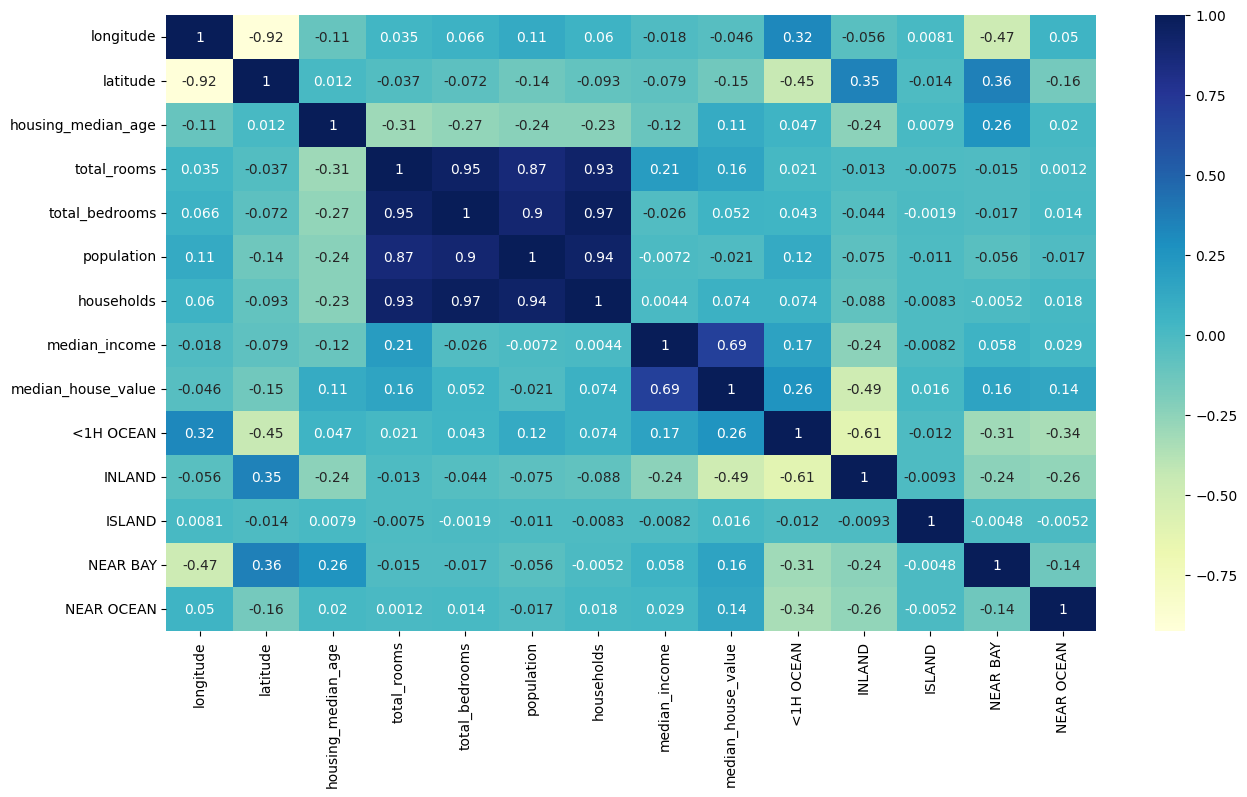

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [ ]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_ration']=train_data['total_rooms']/train_data['households']

In [ ]:
from sklearn.linear_model import LinearRegression
x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
test_data=x_test.join(y_test)
test_data["total_rooms"]=np.log(test_data['total_rooms']+1)
test_data["total_bedrooms"]=np.log(test_data['total_bedrooms']+1)
test_data["population"]=np.log(test_data['population']+1)
test_data["households"]=np.log(test_data['households']+1)
test_data=test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_ration']=test_data['total_rooms']/test_data['households']
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_ration
18888,-122.24,38.11,42.0,7.463937,5.963579,6.791221,5.834811,2.3241,99200.0,0,0,0,1,0,0.798986,1.279208
17467,-119.84,34.44,28.0,6.885510,5.093750,6.287859,5.075174,4.2404,274300.0,0,0,0,0,1,0.739778,1.356704
14318,-117.14,32.70,44.0,6.490724,5.389072,6.768493,5.361292,1.9338,89400.0,0,0,0,0,1,0.830273,1.210664
17271,-119.71,34.40,27.0,8.238273,6.648985,7.463363,6.622736,4.0451,395100.0,0,0,0,0,1,0.807085,1.243938
13895,-116.32,34.14,18.0,7.539559,6.190315,6.902743,6.054439,1.6900,54200.0,0,1,0,0,0,0.821045,1.245294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17163,-122.21,37.37,34.0,7.297768,5.384495,6.419995,5.411646,8.2883,500001.0,0,0,0,0,1,0.737828,1.348530
2779,-114.65,32.79,21.0,3.806662,3.526361,4.174387,3.332205,0.8571,25000.0,0,1,0,0,0,0.926365,1.142386
16832,-122.50,37.59,36.0,7.327781,5.537334,6.602588,5.488938,4.3542,237500.0,0,0,0,0,1,0.755663,1.335009
1003,-121.78,37.69,35.0,7.956477,6.378426,7.474205,6.350886,4.3533,168400.0,0,1,0,0,0,0.801665,1.252814


In [ ]:
reg.score(x_test,y_test)

0.6587772933543123

In [ ]:
x_train_s= scaler.fit_transform(x_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test,y_test)

0.8129035254804754